This notebook is to explore various prediction models from the Used Car Price data 
at : https://www.kaggle.com/CooperUnion/cardataset
Various Regression techniques are explored, with K-fold cross validation, grid search of parameters, including 
Deep Learning techniques and the best approach is selected based on Accuracy

In [1]:
#Import all necessary libraries
import pickle
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense   
from keras import optimizers

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Using TensorFlow backend.


Read the pre-processed pkl files

In [2]:
train_X=pd.read_pickle('C:/users/hackuser1/Hackathon18/train_X_ord.pkl')
test_X=pd.read_pickle('C:/users/hackuser1/Hackathon18/test_X_ord.pkl')
train_Y=pd.read_pickle('C:/users/hackuser1/Hackathon18/train_Y_ord.pkl') # train Y with log(MSRP)
test_Y=pd.read_pickle('C:/users/hackuser1/Hackathon18/test_Y_ord.pkl')
train_Y_orig=pd.read_pickle('C:/users/hackuser1/Hackathon18/train_Y_ord_orig.pkl') # train Y with MSRP unmodified
test_Y_orig=pd.read_pickle('C:/users/hackuser1/Hackathon18/test_Y_ord_orig.pkl')

train_X_make=pd.read_pickle('C:/users/hackuser1/Hackathon18/train_X_ord_make.pkl')
test_X_make=pd.read_pickle('C:/users/hackuser1/Hackathon18/test_X_ord_make.pkl')

print(train_X.shape)
print(train_X_make.shape)

(5556, 47)
(5556, 65)


We fit Sklearn LinearRegression and use this to make predictions on the test data and check the RMSE
Use train X data with make and without make, and Test Y as MSRP as well as Log MSRP and compare the RMSE values on test data

In [23]:
#fit train data without make info, and log MSRP
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_Y)

#fit train data without make and MSRP, as it
lin_reg_1 = LinearRegression()
lin_reg_1.fit(train_X, train_Y_orig)

#fit train data with make and log MSRP
lin_reg_make = LinearRegression()
lin_reg_make.fit(train_X_make, train_Y)

#fit train data with make and MSRP, as it
lin_reg_make1 = LinearRegression()
lin_reg_make1.fit(train_X_make, train_Y_orig)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
carSales_predictions = lin_reg.predict(test_X)
lin_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lin_rmse = np.sqrt(lin_mse)
print("rmse without make, log MSRP:"+str(lin_rmse))

carSales_predictions = lin_reg_1.predict(test_X)
lin_mse = mean_squared_error(test_Y, carSales_predictions)
lin_rmse = np.sqrt(lin_mse)
print("rmse without make, MSRP, as is:"+str(lin_rmse))

carSales_predictions = lin_reg_make.predict(test_X_make)
lin_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lin_rmse = np.sqrt(lin_mse)
print("rmse with make, log MSRP:"+str(lin_rmse))

carSales_predictions = lin_reg_make1.predict(test_X_make)
lin_mse = mean_squared_error(test_Y, carSales_predictions)
lin_rmse = np.sqrt(lin_mse)
print("rmse with make, MSRP, as is:"+str(lin_rmse))

rmse without make, log MSRP:8663.24767682
rmse without make, MSRP, as is:28097.4411188
rmse with make, log MSRP:8298.81451967
rmse with make, MSRP, as is:28055.9651761


We observe the data with make and log MSRP gives best results. We use this data to fit subsequent algorithms.
Next we use SGDRegressor from scikit learn and compare the RMSE

In [34]:
sgd_reg_make = SGDRegressor(max_iter=500,penalty=None,eta0=0.01)
sgd_reg_make.fit(train_X_make, train_Y.values.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=500, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [40]:
carSales_predictions_make = sgd_reg_make.predict(test_X_make)
sgd_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions_make))
sgd_rmse = np.sqrt(sgd_mse)
print("SGD RMSE:"+str(sgd_rmse))
print("predicted prices")
print(np.exp(carSales_predictions_make[0:5]))
print("actual prices")
print(np.exp(test_Y[0:5]))

SGD RMSE:8471.19867171
predicted prices
[ 10436.35938607  23874.66237829  12297.32990036   4129.98480997
  26121.45349847]
actual prices
         0
0  23086.0
1  25581.0
2  19396.0
3   2001.0
4  24786.0


In [41]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X,train_Y)

tree_reg_make = DecisionTreeRegressor()
tree_reg_make.fit(train_X_make,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
carSales_predictions = tree_reg.predict(test_X)
tree_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE, without make:"+str(tree_rmse))

Decision Tree RMSE, without make:3195.07325153


In [45]:
carSales_predictions_make = tree_reg_make.predict(test_X_make)
tree_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions_make))
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE, with make:"+str(tree_rmse))
print("predicted prices")
print(np.exp(carSales_predictions_make[0:5]))
print("actual prices")
print(np.exp(test_Y[0:5]))

Decision Tree RMSE, with make:3110.74905826
predicted prices
[ 21986.  22206.  21696.   2001.  27786.]
actual prices
         0
0  23086.0
1  25581.0
2  19396.0
3   2001.0
4  24786.0


We find Decision tree with make data included reduces the RMSE and is the best so far. We 
validate this using K-fold Cross validation with k set to 10

In [46]:
scores = cross_val_score(tree_reg_make,train_X_make,train_Y,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("scores:",tree_rmse_scores)
print("mean:",tree_rmse_scores.mean())
print("std dev:",tree_rmse_scores.std())

scores: [ 0.11743598  0.11099468  0.10167762  0.11095131  0.10396001  0.10785319
  0.10309168  0.1107515   0.10710575  0.10429869]
mean: 0.107812039723
std dev: 0.00456990247701


This shows there is a good fit, and there is very less variation between the folds and the data is dependable.
We now try RandomForestRegressor, with default parameters

In [47]:
forest_reg_make = RandomForestRegressor()
forest_reg_make.fit(train_X_make,train_Y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
carSales_predictions = forest_reg_make.predict(test_X_make)
forest_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE, with make:"+str(forest_rmse))
print("predicted prices")
print(np.exp(carSales_predictions_make[0:5]))
print("actual prices")
print(np.exp(test_Y[0:5]))

Random Forest Regressor RMSE, with make:3006.58980928
predicted prices
[ 21986.  22206.  21696.   2001.  27786.]
actual prices
         0
0  23086.0
1  25581.0
2  19396.0
3   2001.0
4  24786.0


This is clearly a better fit compared to DecisionTree, and we validate this with k-fold CV

In [49]:
forest_scores = cross_val_score(forest_reg_make,train_X_make,train_Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print("scores:",forest_rmse_scores)
print("mean:",forest_rmse_scores.mean())
print("std dev:",forest_rmse_scores.std())

scores: [ 0.10193718  0.10150114  0.09442559  0.10182752  0.09229687  0.09830095
  0.10000251  0.10201605  0.09789777  0.09280072]
mean: 0.0983006293765
std dev: 0.00366169231293


We now use GridSearch to find the optimum parameters for RandomForestRegression

In [50]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_X_make, train_Y.values.ravel())
print("BEST PARAMETERS FOR RANDOM FOREST REGRESSOR IS:")
grid_search.best_params_

BEST PARAMETERS FOR RANDOM FOREST REGRESSOR IS:


{'max_features': 8, 'n_estimators': 30}

In [51]:
#Fit using best parameters and check
forest_reg_make = RandomForestRegressor(max_features=8,n_estimators=30)
forest_reg_make.fit(train_X_make,train_Y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [52]:
carSales_predictions = forest_reg_make.predict(test_X_make)
forest_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE, with make:"+str(forest_rmse))
print("predicted prices")
print(np.exp(carSales_predictions_make[0:5]))
print("actual prices")
print(np.exp(test_Y[0:5]))

Random Forest Regressor RMSE, with make:3060.57084897
predicted prices
[ 21986.  22206.  21696.   2001.  27786.]
actual prices
         0
0  23086.0
1  25581.0
2  19396.0
3   2001.0
4  24786.0


The observation is : Default parameters gives better results.
We now find the feature importances from the GridSearch.

In [55]:
feature_importances = grid_search.best_estimator_.feature_importances_
num_attribs = ["Engine HP","City MPG","Age"]
categorical_attribs = [  '0.' , ' 3.',   '4.' ,  '5.' ,  '6.',   '8.' , '10.', '12.'] + ['diesel', 'electric' ,'flex-fuel (unleaded/E85)',
 'flex-fuel (unleaded/natural gas)' ,'natural gas', 'premium unleaded (recommended)', 'premium unleaded (required)',
 'regular unleaded'] + ['AUTOMATED_MANUAL' ,'AUTOMATIC' ,'DIRECT_DRIVE' ,'MANUAL', 'UNKNOWN'] + ['all wheel drive','four wheel drive', 'front wheel drive', 'rear wheel drive'] + ['Compact' ,'Large', 'Midsize']+['2dr Hatchback', '2dr SUV' ,'4dr Hatchback', '4dr SUV', 'Cargo Minivan',
 'Cargo Van', 'Convertible', 'Convertible SUV' ,'Coupe', 'Crew Cab Pickup','Extended Cab Pickup' ,'Passenger Minivan' ,'Passenger Van','Regular Cab Pickup', 'Sedan' ,'Wagon']+['Chevrolet', 'Chrysler', 'Dodge', 'FIAT' ,'Ford', 'Honda', 'Hyundai', 'Kia', 'Mazda' ,'Mitsubishi' ,'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac' ,'Scion', 'Subaru','Suzuki', 'Volkswagen']
attributes = num_attribs+categorical_attribs
print(sorted(zip(feature_importances, attributes), reverse=True))

[(0.51222971167234455, 'City MPG'), (0.14792201802189073, 'Engine HP'), (0.040567461767208476, 'AUTOMATIC'), (0.032248768541910007, 'Age'), (0.030703906424741613, 'regular unleaded'), (0.02564030029001552, 'MANUAL'), (0.019372873771421838, 'premium unleaded (recommended)'), (0.015558711475096552, 'Large'), (0.015126838516752013, 'Oldsmobile'), (0.010921668085859251, 'Regular Cab Pickup'), (0.010570801867184867, '8.'), (0.0094306698937316261, 'Plymouth'), (0.0084518531088829275, '4dr SUV'), (0.0074293416542418229, 'Compact'), (0.0064167390653077352, 'Midsize'), (0.0060953032209234278, 'front wheel drive'), (0.0060922616387048423, 'Dodge'), (0.0059768123568712085, '6.'), (0.005647578826506937, 'premium unleaded (required)'), (0.0050926855022228445, '2dr SUV'), (0.0050496014540356727, 'four wheel drive'), (0.0045749585336413113, 'rear wheel drive'), (0.0044071707266135681, 'Crew Cab Pickup'), (0.0042983794471047132, '4.'), (0.0042692483329895255, 'Extended Cab Pickup'), (0.003899959872143

This shows the best predictors are City Mile per gallon, Engine HP, Transmission, Age of car, Fuel Type, Size, MAke, Style. We do retain all parameters in the prediction.

In [57]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_X_make)
final_mse = mean_squared_error(np.exp(test_Y), np.exp(final_predictions))
final_rmse = np.sqrt(final_mse)
print("Random Forest Regressor Final RMSE:"+str(final_rmse))
print("predicted prices")
print(np.exp(carSales_predictions_make[0:5]))
print("actual prices")
print(np.exp(test_Y[0:5]))

final_model_scores = cross_val_score(final_model,train_X_make,train_Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
final_model_scores = np.sqrt(-final_model_scores)

print("scores:",final_model_scores)
print("mean:",final_model_scores.mean())
print("std dev:",final_model_scores.std())

final_model_scores = cross_val_score(final_model,test_X_make,test_Y.values.ravel(),scoring="neg_mean_squared_error",cv=10)
final_model_scores = np.sqrt(-final_model_scores)

print("scores:",final_model_scores)
print("mean:",final_model_scores.mean())
print("std dev:",final_model_scores.std())

Random Forest Regressor Final RMSE:3040.3607784
predicted prices
[ 21986.  22206.  21696.   2001.  27786.]
actual prices
         0
0  23086.0
1  25581.0
2  19396.0
3   2001.0
4  24786.0
scores: [ 0.11199449  0.10856914  0.11540133  0.11024884  0.10283988  0.12166811
  0.11216988  0.12351604  0.10642059  0.12219071]
mean: 0.113501900189
std dev: 0.00669968418204
scores: [ 0.16044081  0.1181285   0.1467781   0.16295343  0.15222958  0.16306924
  0.16020828  0.12874094  0.19367385  0.15581878]
mean: 0.154204150659
std dev: 0.019492107897


We find the model is fitting quite well, with similar RMSE values in train and test data set. We plot the learning curves for the best model and see the learning curve, by plotting the rmse vs size of training set

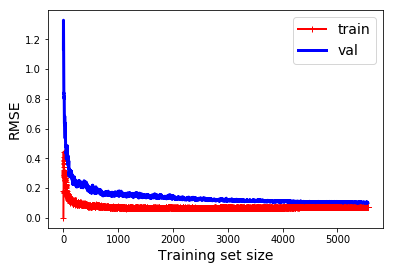

In [30]:
def plot_learning_curves(model, X, y):
    
    train_errors, val_errors = [], []
    for m in range(1, len(X)):
        model.fit(X[:m], y[:m].values.ravel())
        y_train_predict = model.predict(X[:m])
        y_val_predict = model.predict(test_X_make)
        train_errors.append(mean_squared_error(y[:m], y_train_predict))
        val_errors.append(mean_squared_error(test_Y, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)   

plot_learning_curves(final_model, train_X_make, train_Y)
plt.show()

In [58]:
#We try ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(train_X_make, train_Y)
carSales_predictions = elastic_net.predict(test_X_make)
elastic_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
elastic_rmse = np.sqrt(elastic_mse)
print("Elastic Net RMSE:"+str(elastic_rmse))

Elastic Net RMSE:8777.11146489


In [59]:
#We try Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(train_X_make, train_Y)
carSales_predictions = ridge_reg.predict(test_X_make)
ridge_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
ridge_rmse = np.sqrt(ridge_mse)
print("Ridge RMSE:"+str(ridge_rmse))

Ridge RMSE:8268.07759323


In [63]:
#We try Lasso Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_X_make, train_Y)
carSales_predictions = lasso_reg.predict(test_X_make)
lasso_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lasso_rmse = np.sqrt(lasso_mse)
print("Lasso RMSE:"+str(lasso_rmse))

Lasso RMSE:8697.20098706


We find these give worse results. 
We use GradientBoostingRegressor from sklearn finally

In [64]:
gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(train_X_make, train_Y.values.ravel())
carSales_predictions = gbrt.predict(test_X_make)
gbrt_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
gbrt_rmse = np.sqrt(gbrt_mse)
print("Gradient Boosting Regressor RMSE:"+str(gbrt_rmse))

Gradient Boosting Regressor RMSE:3293.94301909


In [65]:
gbrt_slow = GradientBoostingRegressor(max_depth=30, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(train_X_make, train_Y.values.ravel())
carSales_predictions = gbrt_slow.predict(test_X_make)
gbrt_slow_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
gbrt_slow_rmse = np.sqrt(gbrt_slow_mse)
print("Gradient Boosting Regressor SLOW RMSE:"+str(gbrt_slow_rmse))

Gradient Boosting Regressor SLOW RMSE:3111.99605211


In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [100, 200, 300], 'max_depth': [20, 30, 40]},
    # then try 6 (2×3) combinations with bootstrap set as False
    #{'bootstrap': [False], 'n_estimators': [100,200], 'max_depth': [20, 30, 40]},
  ]

gbrt_reg = GradientBoostingRegressor(random_state=42, learning_rate=0.1)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search_gbrt = GridSearchCV(gbrt_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search_gbrt.fit(train_X_make, train_Y.values.ravel())
print("BEST PARAMETERS FOR GRADIENT BOOSTING REGRESSOR IS:")
grid_search_gbrt.best_params_

This shows the best fit is given by RandomForestRegressor.

We now try Deep Learning technique and compare the RMSE. We use keras with tensorflow backend and then repeat the same expt with cntk backend.

In [3]:
model = Sequential()

#We use two hidden layers with 50 and 30 units with Relu activation, and no activation in the output layer, since 
#we want to predict the car price.
model.add(Dense(50,input_dim=(train_X_make.shape[1]),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                3300      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 4,861
Trainable params: 4,861
Non-trainable params: 0
_________________________________________________________________


In [4]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X_make, train_Y, epochs=200,  validation_data=(test_X_make,test_Y), batch_size=5, verbose=0)

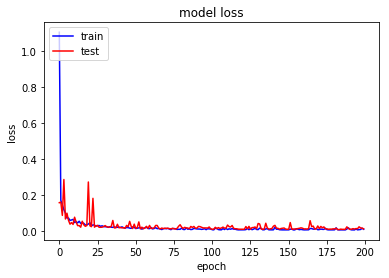

In [5]:
plt.plot(history.history['loss'], color = 'blue')
plt.plot(history.history['val_loss'], color=  'red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learing RMSE with two hidden layers:"+str(dl_rmse))

Deep Learing RMSE with two hidden layers:3490.4683134


We try the same with backend as cntk, we change backend="cntk" in keras.json and rerun the expt

In [6]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print(dl_rmse)

4624.50567544


C:\Anaconda\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input4") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


We try different parameters of Deep Learning to fit the problem better

In [7]:
model = Sequential()
model.add(Dense(50,input_dim=(train_X_make.shape[1]),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                3300      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 4,541
Trainable params: 4,541
Non-trainable params: 0
_________________________________________________________________


In [8]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X_make, train_Y, epochs=300,  validation_data=(test_X_make,test_Y), batch_size=10, verbose=0)

In [9]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learing RMSE with three hidden layers:"+str(dl_rmse))

Deep Learing RMSE with three hidden layers:2748.39994063


In [10]:
model = Sequential()
model.add(Dense(20,input_dim=(train_X_make.shape[1]),activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                1320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 21        
Total params: 1,341
Trainable params: 1,341
Non-trainable params: 0
_________________________________________________________________


In [11]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X_make, train_Y, epochs=200,  validation_data=(test_X_make,test_Y), batch_size=10, verbose=0)

In [12]:
carSales_predictions = model.predict(test_X_make)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learing RMSE with one hidden layer:"+str(dl_rmse))

Deep Learing RMSE with one hidden layer:3934.8550403


We conclude three hidden layers configuration is the best so far.

We now try XGBRegressor, a latest technique. We start by default setting and then use best parameter for n_estimator by trying number of values

In [13]:
xgb_model = XGBRegressor() 
xgb_model.fit(train_X_make, train_Y)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [14]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE:"+str(xgb_rmse))

XGB RMSE:3393.44100697


In [16]:
xgb_model = XGBRegressor(n_estimators=350) 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [17]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350:2833.7119292


In [19]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [20]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=5:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=5:2667.5184859


In [21]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=10) 
xgb_model.fit(train_X_make, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [22]:
carSales_predictions = xgb_model.predict(test_X_make)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=10:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=10:2991.35951284


We conclude the setting of n_estimators=350 and max_depth=5 works best in this case, and this model is the best amongst all the models compared.

We now calculate and display feature importances from the XGBoost model 

[  2.43807226e-01   2.83265948e-01   1.46350861e-01   1.27794407e-03
   1.75060832e-05   3.43119237e-03   8.75304162e-04   3.99138685e-03
   1.13789539e-03   4.02639911e-04   3.50121663e-05   9.97846713e-04
   0.00000000e+00   5.74199529e-03   6.82737271e-04   1.01535278e-03
   4.90170345e-03   2.92351586e-03   3.88635043e-03   5.26933093e-03
   3.17560360e-02   5.25182513e-05   6.96742116e-03   1.75060835e-04
   1.40573848e-02   1.71209499e-02   5.37436781e-03   6.51226286e-03
   1.41624212e-02   7.42257945e-03   5.14678843e-03   8.59548710e-03
   1.59305357e-03   1.15365088e-02   1.07662417e-02   2.66092457e-03
   1.08537718e-03   8.10531620e-03   1.45300489e-03   8.66551138e-03
   6.47725072e-03   8.14032834e-03   3.43119237e-03   1.17290753e-03
   3.23862536e-03   1.48801710e-02   4.91920952e-03   1.11163631e-02
   3.95637471e-03   5.63695887e-03   1.03285897e-03   9.31323599e-03
   2.52087601e-03   6.56478107e-03   5.88204386e-03   6.21465966e-03
   6.37221429e-03   6.21465966e-03

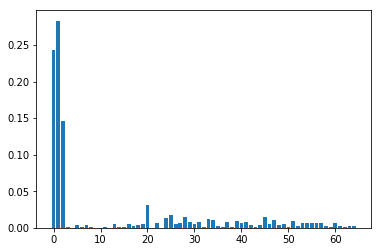

In [23]:
print(xgb_model.feature_importances_)
# plot
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

We see that the numerical features, Engine HP, Age, City MPG has the highest importances, followed by categorical features. Among the categorical
features we find the Transmission type, and Size, and Make have high importances. We drop the Engine Cylinder from Train and Test data and fit our model again.

In [24]:
print(train_X_make.shape[1])
train_X_make_upd = np.delete(train_X_make,[4,5,6,7,8,9,10,11],1) # we drop the 8 columns after the first 3 numeric ones
print(train_X_make_upd.shape[1])

65
57


In [25]:
test_X_make_upd = np.delete(test_X_make,[4,5,6,7,8,9,10,11],1)

In [27]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make_upd, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
carSales_predictions = xgb_model.predict(test_X_make_upd)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=5:"+str(xgb_rmse))

XGB RMSE, with n_estmators=350,max_depth=5:2683.96022928


We find removing the Engine cylinder categorical variable, does not have any effect on the model. We now try removing the Engine fuel type categorical variable

In [29]:
print(train_X_make.shape[1])
train_X_make_upd1 = np.delete(train_X_make,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],1) # we drop the 8 columns after the first 3 numeric ones
print(train_X_make_upd1.shape[1])

65
49


In [30]:
test_X_make_upd1 = np.delete(test_X_make,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],1)

In [31]:
xgb_model = XGBRegressor(n_estimators=350, max_depth=5) 
xgb_model.fit(train_X_make_upd1, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [35]:
carSales_predictions = xgb_model.predict(test_X_make_upd1)
xgb_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE, with n_estmators=350,max_depth=5:"+str(xgb_rmse))
print("predicted prices")
print(np.exp(carSales_predictions[0:5]))
print("actual prices")
print(np.exp(test_Y[0:5]))

XGB RMSE, with n_estmators=350,max_depth=5:2682.05169176
predicted prices
[ 21703.92773438  23602.3671875   20006.84179688   1944.84020996
  26475.63085938]
actual prices
         0
0  23086.0
1  25581.0
2  19396.0
3   2001.0
4  24786.0


In [ ]:
We find removing the Engine cylinder and Fuel type categorical variables, does not have any effect on the model. 
We decide to drop the Engine Cylinder and Engine Fuel Type based on this analysis from our original set of parameters.
So our final model has the numerical parameters : Engine HP, Age of Car, log City MPG
and the categorical parameters : Transmission Type, Driven Wheels, Vehicle Size, Vehicle Style and Make

In [34]:
# save model to file
pickle.dump(xgb_model, open("C:/users/hackuser1/carsales_xgb.pickle.dat", "wb"))


# load model from file
#loaded_model = pickle.load(open("C:/users/hackuser1/carsales_xgb.pickle.dat", "rb"))
